# Regression

Regression is a supervised machine learning process. It is similar to classification, but rather than predicting a label, we try to predict a continuous value. If you are trying to predict a number, then use regression.

Though there are similarities with the classification models and hyperparameters, the evaluation metrics are different for regression. We will be using the Boston housing dataset to explore the types of regression models. 

Here we load the data create a split version for training and testing, and create another split version with standardized data:

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
from sklearn import model_selection, preprocessing

In [7]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
X_std = preprocessing.StandardScaler().fit_transform(X)

In [10]:
X_train_std, X_test_std, y_train_std, y_test_std = model_selection.train_test_split(X_std, y, test_size=0.3, random_state=42)

## Description of Features

| Feature 	| Description                                                                                    	|
|---------	|------------------------------------------------------------------------------------------------	|
| CRIM    	| Per capita crime rate by town                                                                  	|
| ZN      	| Proportion of residential land zoned for lots over 25,000                                      	|
| INDUS   	| Proportion of non-retail business acres per town                                               	|
| CHAS    	| Charles River dummy variable (1 if tract bounds river; 0 otherwise)                            	|
| NOX     	| Nitric oxides concentration (parts per 10 million)                                             	|
| RM      	| Average number of rooms per dwelling                                                           	|
| AGE     	| Proportion of owner-occupied units built prior to 1940                                         	|
| DIS     	| Weighted distances to five Boston employment centers                                           	|
| RAD     	| Index of accessibility to radial highways                                                      	|
| TAX     	| Full-value property tax rate per \$10,000                                                       	|
| PTRATIO 	| Pupil-teacher ratio by town                                                                    	|
| B       	| $1000(Bk - 0.63)^2$, where Bk is the proportion of black people in town (dataset is from 1978) 	|
| LSTAT   	| Percent lower status of the population                                                         	|
| MEDV    	| Median value of owner-occupied homes in increments of \$1000                                    	|

## Baseline Model

A baseline regression model will give us something to compare our other models to. In skelarn, the default result of the `.score` method is the *coefficient of determination* ($r^2$ or $R^2$). This number explains the percent of variation of the input data that the prediction captures. The value is typically between 0 and 1, but it can be negative in the case of particularly bad models.

The default strategy of the `DummyRegressor` is to predict the mean value of the training set. We can see that this model does not perform well:


In [11]:
from sklearn.dummy import DummyRegressor
dr = DummyRegressor()
dr.fit(X_train, y_train)
dr.score(X_test, y_test)

-0.03469753992352409

## Linear Regression

Simple linear regression tries to fit a form of the formula $y=mx + b$ while minimizing the square of the errors. When solved, we have an intercept and coefficient. The intercept gives a base value for a prediction modified by adding the product of the coefficient and the input. 

This form can be generalized to higher dimensions. In that case each feature has a coefficient. The larger the absolute value of the coefficient, the more impact the feature has on the target.

This model assumes that the prediction is a linear combination of the inputs. For some datasets, this is not flexible enough. Complexity can be added by transforming the features. If this leads to overfitting, ridge and lasso regression may be used to regularize the estimator.

This model is susceptible to *heteroscedasticity*. This is the idea that the input values change in size, the error of the prediction (or the residuals) often change as well. If you plot the input against the residuals, you will see a fan or cone shape. 

Another issue to be aware of is *multicollinearity*. If features have high correlation, it can hinder interpretation of the coefficients. This usually does not impact the model, only coefficient meaning. 

## Model Characteristics

- *Runtime efficiency* Use n_jobs to speed up performance
- *Preprocess data* Standardize data before training the model
- *Prevent overfitting* You can simplify the model by not using and adding polynomial features
- *Interpret results* Can interpret results as weights for feature contribution, but assumes normality and independence of features. You might want to remove colinear features to improve interpretability. $R^2$ will tell you how much of the total variance of the outcome is explained by the model.

Here is an example:

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7112260057484936

In [12]:
pd.DataFrame({"Feature":X_train.columns,"Coef.": lr.coef_})

Feature      Coef.
0      CRIM  -0.133470
1        ZN   0.035809
2     INDUS   0.049523
3      CHAS   3.119835
4       NOX -15.417061
5        RM   4.057199
6       AGE  -0.010821
7       DIS  -1.385998
8       RAD   0.242727
9       TAX  -0.008702
10  PTRATIO  -0.910685
11        B   0.011794
12    LSTAT  -0.547113

In [16]:
lr.intercept_

31.63108403569394

The `intercept_` value is the expected mean value. You can see how scaling the data affects the coefficients. The sign of the coefficients explains the direction of the relation between the feature and target. A positive sign indicates that as the feature increases, the label increases. The negative sign indicates that as the feature increases, the label decreases. The larger the absolute value of the coefficient, the more impact it has:

In [30]:
lr2 = LinearRegression()
lr2.fit(X_train_std, y_train_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
lr2.score(X_test_std, y_test_std)

0.7112260057484926

In [20]:
lr2.intercept_

22.50945471291039

In [33]:
pd.DataFrame({"Feature":X_train.columns,"Coef.": lr2.coef_})

Feature       Coef.
0      CRIM  -29.384642
1        ZN   21.375945
2     INDUS    8.695814
3      CHAS   20.282202
4       NOX  -45.725799
5        RM   72.963393
6       AGE   -7.796175
7       DIS  -74.700104
8       RAD   54.095373
9       TAX  -37.539309
10  PTRATIO  -50.463248
11        B   27.559522
12    LSTAT -100.000000

In [26]:
from yellowbrick.features import FeatureImportances

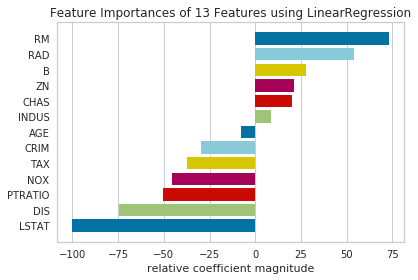

In [34]:
fig, ax = plt.subplots(figsize=(6,4))
fi_viz = FeatureImportances(lr2, labels=X_train.columns)
fi_viz.fit(X_train_std, y_train_std)
fi_viz.poof();

Feature importance: This indicates that RM (number of rooms) increases the price, age doesn't really matter, and LSTAT (percent of low status in population) lowers the price.

## SVM

Support vector machines can perform regression as well. 

### Model Characteristics

- *Runtime efficiency* The scikit-learn implementation is $O(n^4)$, so it can be hard to scale to large sizes. Using linear kernel or the `LinearSVR` model can improve the runtime performance at perhaps the cost of accuracy. Upping the `cache_size` parameter can bring that down to $O(N^3)$.

- *Preprocess data* the algorithm is not scale invariant, so standardizing the data is recommended.

- *Prevent overfitting* The C controls regularization. A smaller value allows for a smaller margin in the hyperplane. The higher value for gamma will tend to overfit the training data. The `LinearSVR` model supports a loss and penalty parameter for regularization. The epsilon parameter can be raised (with 0 you should expect overfitting).

- *Interpret results* Inspect `.support_vectors_`, though these are hard to interpret. With linear kernels, you can inspect `.coef_`.

In [38]:
from sklearn.svm import SVR
svr = SVR(gamma='auto')
svr.fit(X_train_std, y_train_std)
svr.score(X_test_std, y_test_std)

0.6553772022206867

## K-Nearest Neighbor

The KNN model supports regression by finding k neighbor targets to the sample for which you want to predict. For regression, this model averages the targets to gether to determine a prediction.

## Model Characteristics

- *Runtime efficiency* Training runtime is $O(1)$, but there is a trade-off as the sample data needs to be stored. Testing runtime is $O(Nd)$, where $N$ is the number of trainign examples and d is dimensionality.

- *Preprocess data* Yes, distance-based calculations perform better when standardized.

- *Prevent overfitting* Raise n_neighbors. Change p for L1 or L2 metric

- *Interpret results* Interpret the k-nearest nieghbors to the sample. Those neighbors explain your result.

In [40]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(X_train_std, y_train_std)
knr.score(X_test_std, y_test_std)

0.7476242635592417

## Decision Tree

Decision trees support classification and regression. At each level of the tree, various split on features are evaluated. The split that will produce the lower error (impurity) is chosen. The criterion parameter can be adjuste dto determine the metric for impurity.

## Model Characteristics

- *Runtime efficiency* For creation, loop over each of the m features we have to sort all n samples: $O(mn log n)$. For predictin, you walk the tree: O(height).

- *Preprocess data* Scaling not necessary. Need to get rid of missing values and convert to numeric.

- *Prevent overfitting* Set max_depth to a lower number, raise min_impurity_decrease.

- *Interpret results* Can set through the tree of choices. Since there are steps, a tree is bad at dealing with linear relationships. The tree is also highly dependent on the training data. A small change can change the whole tree.

In [14]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
dtr.score(X_test, y_test)

0.8559207694719114

View the tree

In [15]:
import pydotplus
from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
dot_data = StringIO()
export_graphviz(dtr, out_file=dot_data,feature_names=X_train.columns,
                    filled=True)
g = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(g.create_png())

This plot is too wide. We can limit the depth of the chart. It turns out that the most important features are typically near the top of the tree. We use the max_depth parameter to do this:

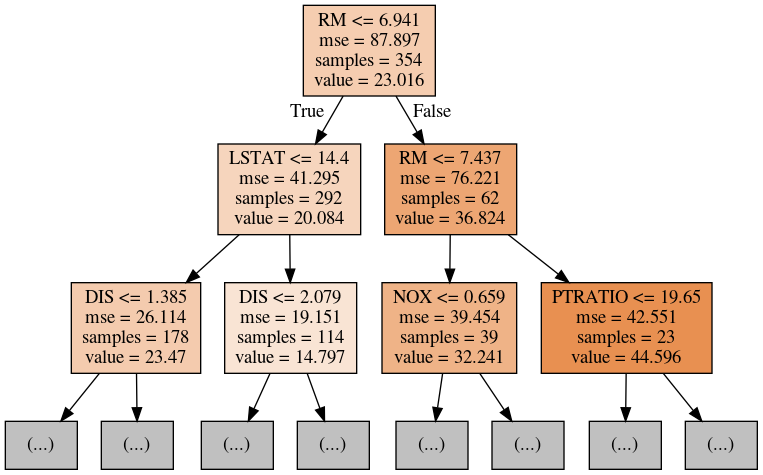

In [16]:
dot_data = StringIO()
export_graphviz(dtr, max_depth=2, out_file=dot_data, feature_names=X_train.columns,filled=True)
g = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(g.create_png())

We can also use dtreeviz to view a scatter plot at each of the nodes of the tree. We will use a tree limited to a depth of two so we can see the details:


In [19]:
from dtreeviz.trees import dtreeviz
dtr3 = DecisionTreeRegressor(max_depth=2)
dtr3.fit(X_train, y_train)
viz = dtreeviz(dtr3, X_train, y_train,target_name="price",feature_names=X_train.columns)

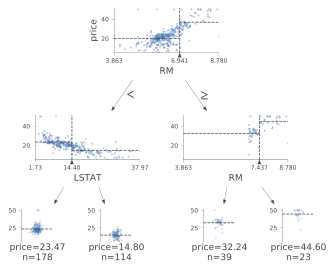

In [20]:
viz

Feature importance:

In [55]:
for col, val in sorted(zip(X_train.columns, dtr.feature_importances_),
                       key=lambda x: x[1], reverse=True)[:5]:
    print(f"{col:10}{val:10.3f}")

RM             0.576
LSTAT          0.192
DIS            0.111
CRIM           0.035
NOX            0.029


## Random Forest

Decision trees are good since they are explainable, but they have a tendency to overfit. A random forest trades some of the explainablity for a model that tend to generalize better. This model can also be used fr regression.

## Model Characteristics

- *Runtime efficiency* For creation, loop over each of the m features, and sort all n samples, O(mn log n). For predicting, you walk the tree, O(height).

- *Preprocess data* Scaling is not necessary. Need to get rid of missing values and convert to numeric.

- *Prevent overfitting* Add more trees. Use lower max_depth.

- *Interpret results* Supports feature importance, but we do not have a single decision tree that we can walk through. Can inspect single trees from the ensemble.


In [56]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=42, n_estimators=100)
rfr.fit(X_train,y_train)
rfr.score(X_test, y_test)

0.8721182042634867

Feature importance:


In [57]:
for col, val in sorted(zip(X_train.columns, rfr.feature_importances_),key=lambda x: x[1],reverse=True)[:5]:
    print(f"{col:10}{val:10.3f}")

RM             0.439
LSTAT          0.380
DIS            0.067
CRIM           0.032
PTRATIO        0.020


## XGBoost Regression

The XGBoost supports regression. It builds a simple decision tree, then "boosts" it by adding subsequent trees. Each tree tries to correct the residuals of the previous output. 

## Model Characteristics

- *Runtime efficiency* XGBoost is parallelizeable. Use the `n_jobs` option to indicate the number of CPUs. Use GPU for even better performance. 

- *Preprocess data* No scaling necessary with tree models. Need to encode categorical data.

- *Prevent overfitting* The `early_stopping_rounds=N` parameter can be set to stop training if there is no improvement after N rounds. L1 and L2 regularization are controlled by `reg_alpha` and `reg_lambda`, respectively. Higher numbers are more conservative.

- *Interpret results* Has feature importance.

In [21]:
import xgboost as xgb
xgr = xgb.XGBRegressor(random_state=42)
xgr.fit(X_train, y_train)
xgr.score(X_test, y_test)

[11:50:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.871679473122472

In [22]:
xgr.predict(X_train.iloc[[0]])

array([27.269186], dtype=float32)

In [23]:
for col, val in sorted(zip(X_train.columns, xgr.feature_importances_),key=lambda x: x[1],reverse=True)[:5]:
    print(f"{col:10}{val:10.3f}")

LSTAT          0.485
RM             0.263
PTRATIO        0.060
NOX            0.051
DIS            0.032


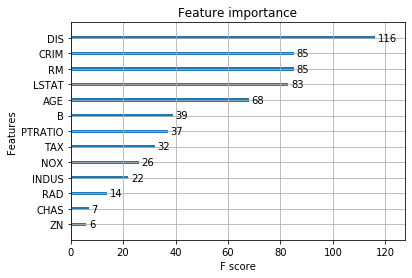

In [24]:
xgb.plot_importance(xgr); # Non-normalized

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


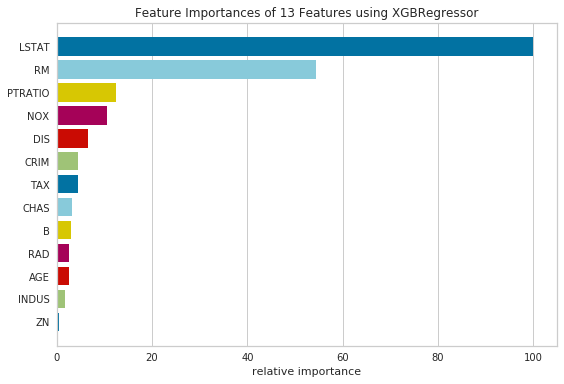

In [26]:
from yellowbrick.features import FeatureImportances
fi_viz = FeatureImportances(xgr)
fi_viz.fit(X_train, y_train)
fi_viz.poof(); # Normalized